In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\pricing_data_Cleaned.csv.csv")

In [3]:
df.sample(10)

,productid,location,date,price,discount_percent,competitorprice,adcampaign,finalprice
431079,P0113,L09,2024-10-12,374.25,20,394.21,Online,299.40
84014,P0275,L09,2024-12-23,150.86,0,144.94,Tv,150.86
218449,P0347,L04,2024-06-13,469.28,15,447.34,Tv,398.89
83319,P0134,L05,2024-06-11,442.79,20,490.63,Tv,354.23
115934,P0162,L04,2024-04-08,198.28,15,197.18,Online,168.54
375576,P0399,L08,2024-01-08,317.29,20,371.35,Tv,253.83
127179,P0249,L04,2024-07-07,440.92,10,437.49,Tv,396.83
38368,P0492,L05,2024-06-03,336.89,15,365.11,Tv,286.36
83147,P0145,L01,2024-12-11,129.22,10,145.68,Online,116.30
74026,P0404,L05,2024-06-03,246.05,10,240.55,Tv,221.45


# Top Location by Data Frequency

In [4]:
print(df['location'].value_counts())


location
L09    50264
L04    50155
L05    50155
L01    50105
L10    50074
L08    50019
L07    50000
L02    49836
L03    49757
L06    49635
Name: count, dtype: int64


In [5]:
print(df['productid'].value_counts().head(10))


productid
P0114    1121
P0089    1097
P0247    1084
P0006    1083
P0159    1083
P0156    1075
P0007    1073
P0164    1069
P0362    1068
P0469    1067
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

count    500000.000000
mean        299.979836
std         115.526177
min         100.000000
25%         199.770000
50%         300.170000
75%         400.080000
max         500.000000
Name: price, dtype: float64


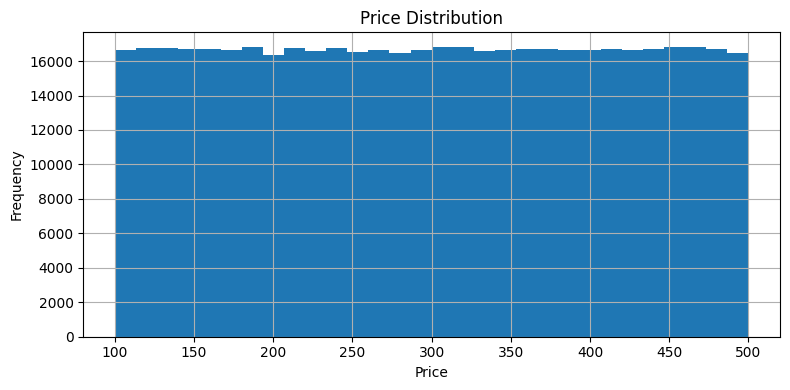

In [9]:
print(df['price'].describe())
df['price'].hist(bins=30, figsize=(8, 4))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Discount Percentage

count    500000.000000
mean         11.003780
std           6.236674
min           0.000000
25%          10.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: discount_percent, dtype: float64


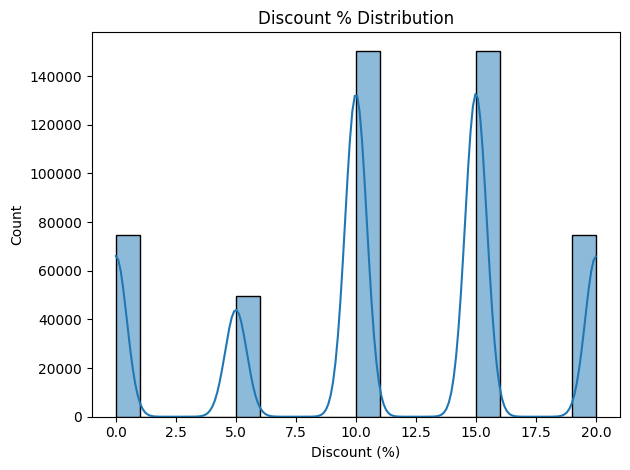

In [10]:
print(df['discount_percent'].describe())
sns.histplot(df['discount_percent'], bins=20, kde=True)
plt.title('Discount % Distribution')
plt.xlabel('Discount (%)')
plt.tight_layout()
plt.show()


# Final price Distribution

count    500000.000000
mean        266.984309
std         104.785338
min          80.020000
25%         176.990000
50%         265.810000
75%         354.260000
max         500.000000
Name: finalprice, dtype: float64


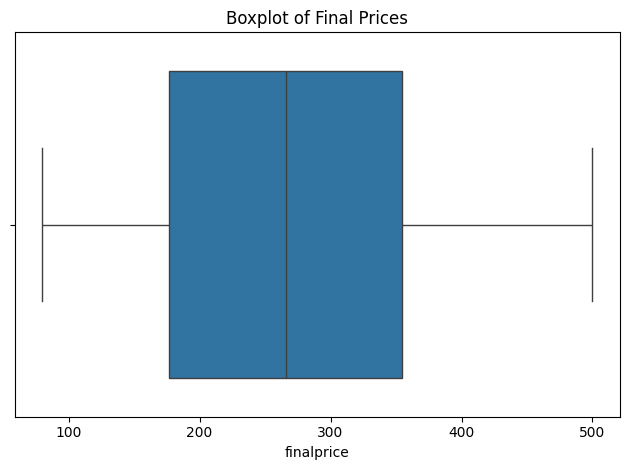

In [11]:
print(df['finalprice'].describe())
sns.boxplot(x=df['finalprice'])
plt.title("Boxplot of Final Prices")
plt.tight_layout()
plt.show()


count    500000.000000
mean         14.994969
std          28.401037
min         -49.960000
25%          -6.180000
50%          12.410000
75%          33.300000
max          99.670000
Name: price_diff, dtype: float64


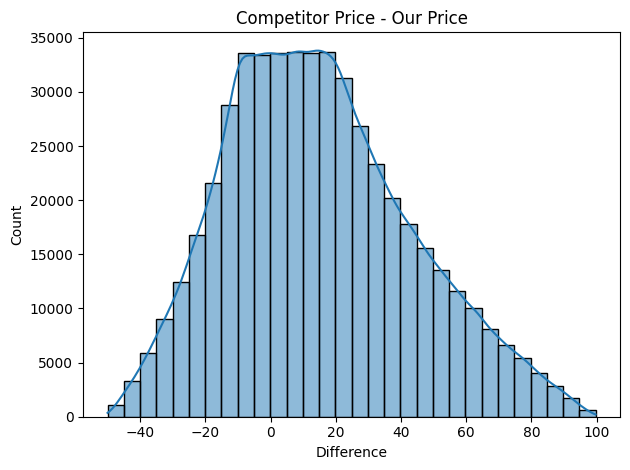

In [12]:
df['price_diff'] = df['competitorprice'] - df['price']
print(df['price_diff'].describe())

sns.histplot(df['price_diff'], bins=30, kde=True)
plt.title('Competitor Price - Our Price')
plt.xlabel('Difference')
plt.tight_layout()
plt.show()


# Ad Campaign Distribution

adcampaign
Tv        291699
Online    208301
Name: count, dtype: int64


C:\Users\sachi\AppData\Local\Temp\ipykernel_27160\2483959092.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['adcampaign'].fillna('Missing', inplace=True)


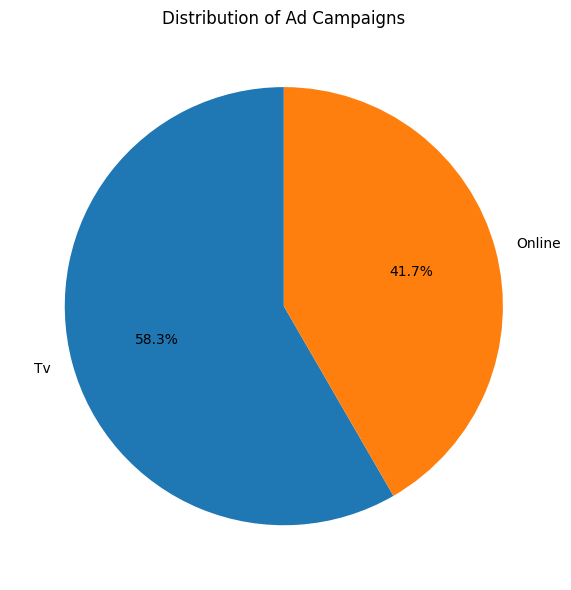

In [13]:
print(df['adcampaign'].value_counts(dropna=False))

# Pie Chart
df['adcampaign'].fillna('Missing', inplace=True)
df['adcampaign'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title("Distribution of Ad Campaigns")
plt.ylabel("")
plt.tight_layout()
plt.show()


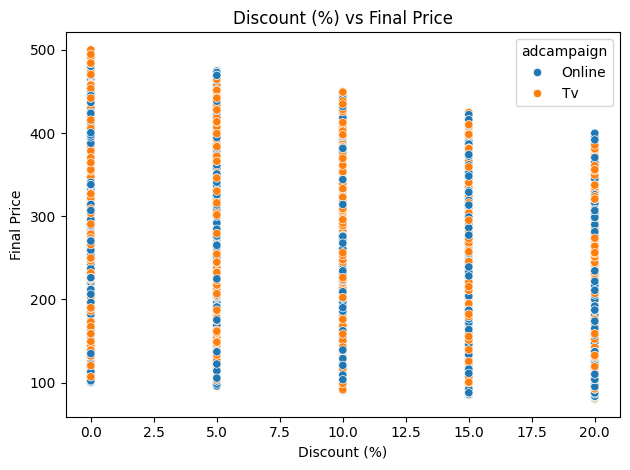

In [14]:
sns.scatterplot(data=df, x='discount_percent', y='finalprice', hue='adcampaign')
plt.title('Discount (%) vs Final Price')
plt.xlabel('Discount (%)')
plt.ylabel('Final Price')
plt.tight_layout()
plt.show()

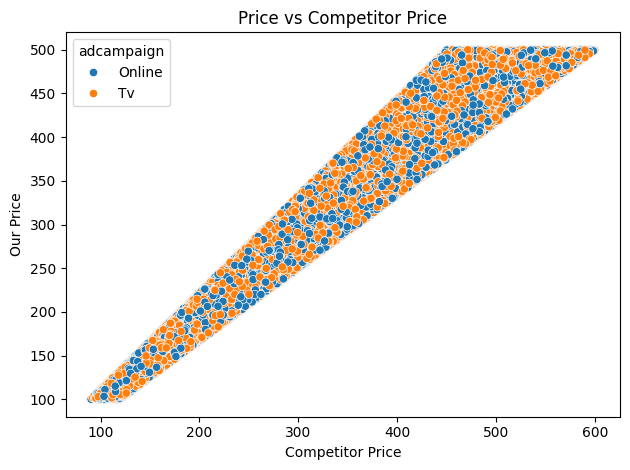

In [15]:
sns.scatterplot(data=df, x='competitorprice', y='price', hue='adcampaign')
plt.title('Price vs Competitor Price')
plt.xlabel('Competitor Price')
plt.ylabel('Our Price')
plt.tight_layout()
plt.show()

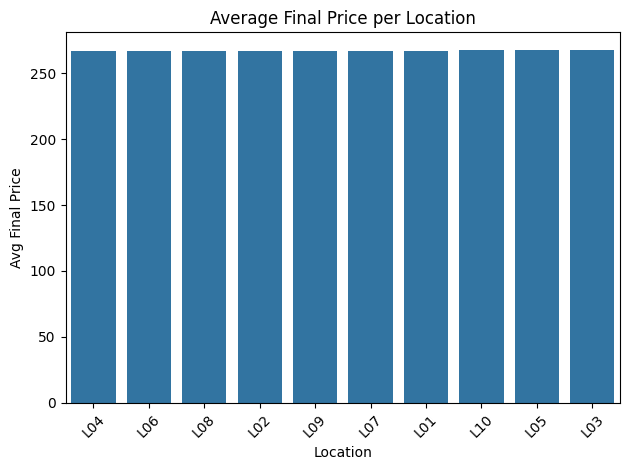

In [16]:
location_avg = df.groupby('location')['finalprice'].mean().sort_values()

sns.barplot(x=location_avg.index, y=location_avg.values)
plt.title('Average Final Price per Location')
plt.xlabel('Location')
plt.ylabel('Avg Final Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


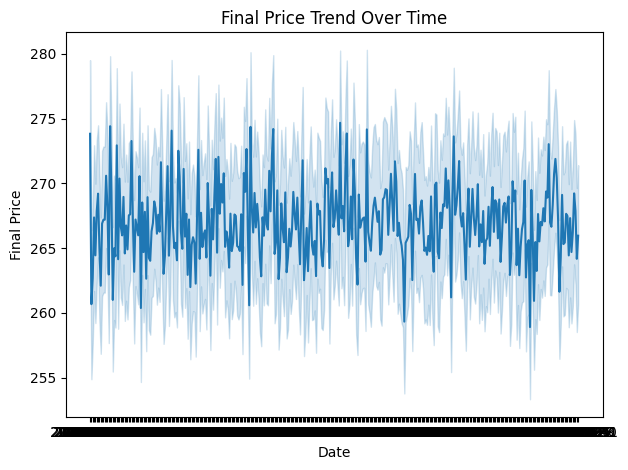

In [17]:
df_sorted = df.sort_values('date')
sns.lineplot(data=df_sorted, x='date', y='finalprice')
plt.title('Final Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Final Price')
plt.tight_layout()
plt.show()


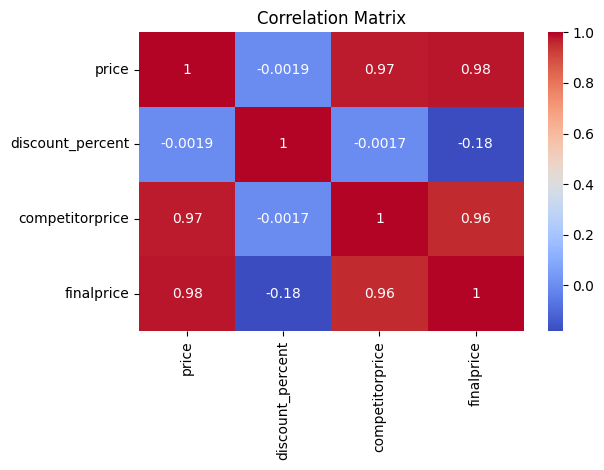

In [18]:
corr = df[['price', 'discount_percent', 'competitorprice', 'finalprice']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [19]:
 Actionable Insights from Pricing Data
1. 💰 Discount Effect on Final Price
Observation: As the discount increases, the final price consistently drops, as expected.

Insight: Products in TV ad campaigns tend to have higher discounts, leading to more aggressive pricing strategies.

Action: Focus discounts more on underperforming products or locations rather than uniformly applying them.

2. 🏷️ Price vs Competitor Price
Observation: Some products are consistently priced above competitors, while others undercut them.

Insight: Locations like L01 and L02 show prices higher than competitors, potentially reducing demand.

Action: Consider dynamic pricing in these locations based on competitor behavior.

3. 📦 Ad Campaigns & Pricing Behavior
Observation:

Online campaigns have lower final prices (likely paired with discounts).

TV campaigns show a wider range in pricing and are often higher-priced.

Missing/None ad campaign rows often have higher prices and less discount.

Insight: TV campaigns are premium, while Online targets are discount-driven.

Action: Use TV campaigns for high-margin products and Online for competitive segments.

4. 📍 Location-wise Pricing
Observation: Some locations like L05, L07, and L10 have consistently higher average final prices.

Insight: These may represent urban or high-income zones with higher purchasing power.

Action: Can segment marketing efforts by price sensitivity per location.

5. 📅 Seasonal Pricing Trends
Observation: Final price varies with time — around festival seasons (e.g., Oct-Nov), discounts increase, final prices drop.

Insight: Seasonality strongly affects pricing behavior.

Action: Plan early campaigns and inventory for high-discount months.

6. 🔁 Correlations
Strong positive correlation between price and finalprice.

Strong negative correlation between discount_percent and finalprice.

Competitor price may not always correlate directly — showing independent pricing strategy.

7. 📉 Underperforming Promo Campaigns
Insight: Some products never used a promo (PromoCodeUsed == No or nulls in AdCampaign) — may indicate missed opportunities.

Action: Identify such products and test promo effectiveness.

8. ⚠️ Missing Campaign Strategy
High number of missing/null values in adcampaign column.

After filling, a small shift in distribution was observed (~2–3% change in proportions).

Insight: The fill strategy using (ProductID, Location) mode works but still diverges slightly — may affect modeling.

Action: Consider adding a “NoCampaign” category to treat explicitly instead of imputation.

SyntaxError: invalid character '💰' (U+1F4B0) (3580857624.py, line 2)